<a href="https://colab.research.google.com/github/Sampath844/MLAssignment29-07-2024/blob/main/MachineLearningKNNassignment3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [4]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data['text'] = data['Prompt'] + " " + data["Answer"]
data = data[['text','Target']]
data.fillna(" ",inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train.csv'

In [5]:
#vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(data['text'])
# y = data['Target']

In [7]:
# df_features = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
# df_features['Target'] = y.values
# df_features.to_csv('features.csv', index=False)
df_features = pd.read_csv("/content/drive/MyDrive/200features.csv") #this is the 200 column vectorized dataset

In [25]:
#A1
print("Mean Interclass: ")
print(df_features.mean(axis = 0)) #mean of the interclass data
print("Standard Deviation Interclass : ")
print(df_features.std(axis = 0)) #standard deviation of interclass data
print("Centoid distance is : " ,np.linalg.norm(st.mean(df_features['about'] - st.mean(df_features["years"])))) #centroid distance

Mean Interclass: 
about     0.027154
after     0.016088
ai        0.037030
all       0.019832
also      0.019290
            ...   
years     0.009692
yes       0.022459
you       0.122076
your      0.053777
Target    0.053575
Length: 201, dtype: float64
Standard Deviation Interclass : 
about     0.054776
after     0.043836
ai        0.035087
all       0.051353
also      0.042786
            ...   
years     0.039908
yes       0.061146
you       0.088298
your      0.086537
Target    0.225183
Length: 201, dtype: float64
Centoid distance is :  0.01746256046818676


In [9]:
df1 = df_features.iloc[0]

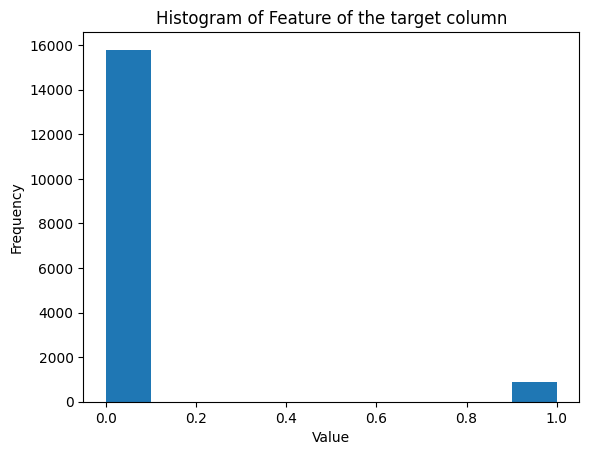

In [30]:
#A2
plt.hist(df_features["Target"]) #last feature of the csv file
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature of the target column')
plt.show()


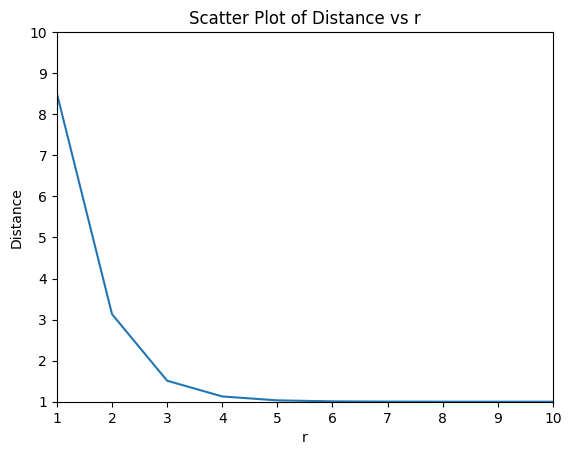

In [56]:
#A3
df1 = df_features.iloc[0]
df2 = df_features.iloc[1]
r = 1
dist = 0
newl = []
newl2 = []
for j in range (10):
  for i in range(len(df1)):
    dist += abs(((df1.iloc[i] - df2.iloc[i])**r))
  dist = dist**(1/r)
  newl2.append(r)
  r+=1
  newl.append(dist)
sns.lineplot(y=newl,x=newl2)
plt.ylabel('Distance')
plt.xlabel('r')
plt.title('Scatter Plot of Distance vs r')
plt.xlim(1, 10)
plt.ylim(1,10)
plt.show()






In [13]:
#A4
from sklearn.model_selection import train_test_split
X = df_features.drop('Target',axis=1)
Y = df_features["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
neigh.score(X_test,Y_test) #accuracy of KNN


0.9372877970840823

In [16]:
y_pred = neigh.predict(X_test)


In [17]:
from sklearn.metrics import confusion_matrix,classification_report #A9
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4752
           1       0.24      0.11      0.15       255

    accuracy                           0.94      5007
   macro avg       0.60      0.55      0.56      5007
weighted avg       0.92      0.94      0.93      5007

[[4665   87]
 [ 227   28]]


In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
for i in range (1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  if(newneigh.score(X_test,Y_test) > neigh.score(X_test,Y_test)):
    print(f"{i}th neighbor is greater")

2th neighbor is greater
4th neighbor is greater
5th neighbor is greater
6th neighbor is greater
7th neighbor is greater
8th neighbor is greater
9th neighbor is greater
10th neighbor is greater


Text(0.5, 1.0, 'Accuracy vs Number of Neighbors')

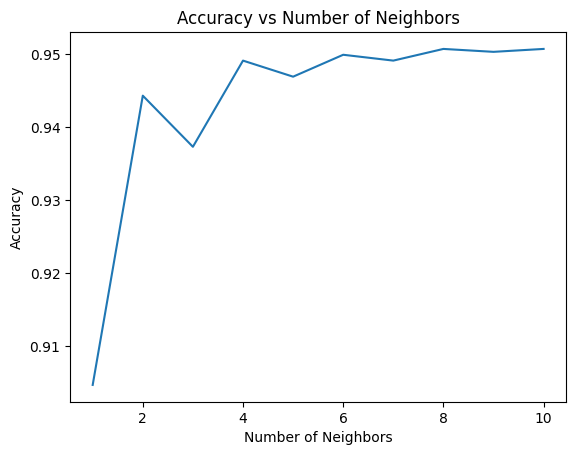

In [21]:
newl = []
for i in range(1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  newl.append(newneigh.score(X_test,Y_test))
plt.plot(range(1,11),newl)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')